In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
data=pd.read_csv(r"car performance-dataset.csv")

In [3]:
data.drop("car name",axis=1,inplace=True)
data.drop("origin",axis=1,inplace=True)

In [4]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
dtype: bool

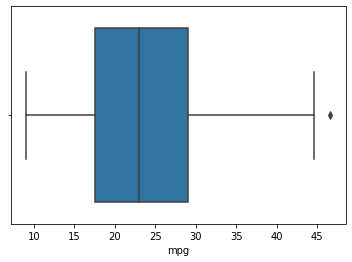

In [6]:
sea.boxplot(data["mpg"])

In [7]:
q3=data["mpg"].describe()["75%"]
q1=data["mpg"].describe()["25%"]
iqr=q3-q1
ub=q3+(1.5*iqr)

In [8]:
data[data["mpg"]>ub]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
322,46.6,4,86.0,65,2110,17.9,80


In [9]:
(data[data["mpg"]>ub].shape[0] / data["mpg"].shape[0])*100

0.25125628140703515

In [10]:
outi=data[data["mpg"]>ub].index
data.drop(outi,inplace=True)

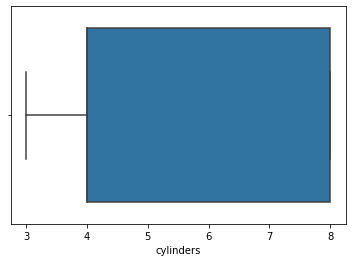

In [11]:
sea.boxplot(data["cylinders"])

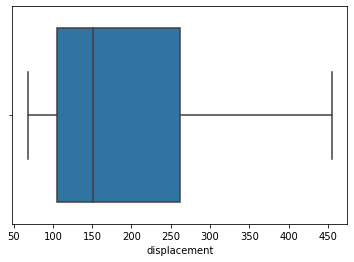

In [12]:
sea.boxplot(data["displacement"])

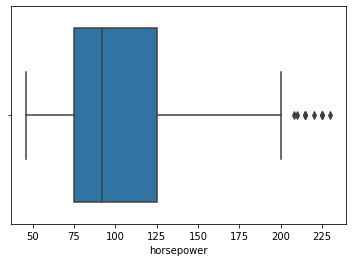

In [13]:
sea.boxplot(data["horsepower"])

In [14]:
q3=data["horsepower"].describe()["75%"]
q1=data["horsepower"].describe()["25%"]
iqr=q3-q1
ub=q3+(1.5*iqr)

In [15]:
data[data["horsepower"]>ub]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
6,14.0,8,454.0,220,4354,9.0,70
7,14.0,8,440.0,215,4312,8.5,70
8,14.0,8,455.0,225,4425,10.0,70
13,14.0,8,455.0,225,3086,10.0,70
25,10.0,8,360.0,215,4615,14.0,70
27,11.0,8,318.0,210,4382,13.5,70
67,11.0,8,429.0,208,4633,11.0,72
94,13.0,8,440.0,215,4735,11.0,73
95,12.0,8,455.0,225,4951,11.0,73
116,16.0,8,400.0,230,4278,9.5,73


In [16]:
(data[data["horsepower"]>ub].shape[0] / data["horsepower"].shape[0])*100

2.518891687657431

#### we dont drop since 2.51

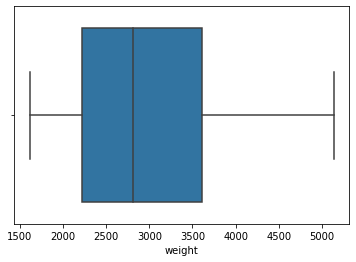

In [17]:
sea.boxplot(data["weight"])

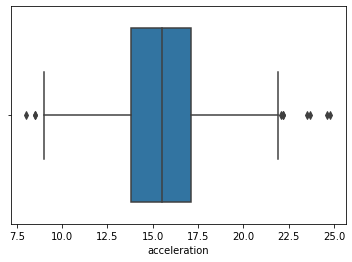

In [18]:
sea.boxplot(data["acceleration"])

In [19]:
q3=data["acceleration"].describe()["75%"]
q1=data["acceleration"].describe()["25%"]
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)

In [20]:
data[data["acceleration"]<lb]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
7,14.0,8,440.0,215,4312,8.5,70
9,15.0,8,390.0,190,3850,8.5,70
11,14.0,8,340.0,160,3609,8.0,70


In [21]:
data[data["acceleration"]>ub]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
59,23.0,4,97.0,54,2254,23.5,72
195,29.0,4,85.0,52,2035,22.2,76
196,24.5,4,98.0,60,2164,22.1,76
299,27.2,4,141.0,71,3190,24.8,79
300,23.9,8,260.0,90,3420,22.2,79
326,43.4,4,90.0,48,2335,23.7,80
394,44.0,4,97.0,52,2130,24.6,82


In [22]:
(data[data["acceleration"]>ub].shape[0] / data["acceleration"].shape[0])*100

1.7632241813602016

In [23]:
(data[data["acceleration"]<lb].shape[0] / data["acceleration"].shape[0])*100

0.7556675062972292

In [24]:
outi1=data[data["acceleration"]<lb].index
outi2=data[data["acceleration"]>ub].index
data.drop(outi1,inplace=True)
data.drop(outi2,inplace=True)

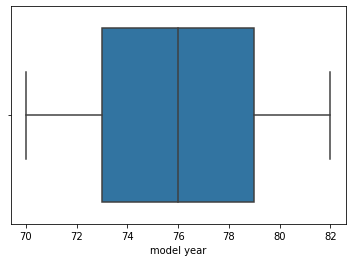

In [25]:
sea.boxplot(data["model year"])

#### Model Building

In [26]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=73)

In [28]:
from sklearn.ensemble import RandomForestRegressor
car_model = RandomForestRegressor(n_estimators=30,criterion='mse')
car_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
y_pred=car_model.predict(x_test)

In [30]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [31]:
accuracy

0.9323241194884919

In [32]:
y_pred_train=car_model.predict(x_train)

In [33]:
accuracy = r2_score(y_train,y_pred_train)

In [34]:
accuracy

0.9761307857768792

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

2.159696579670236

In [37]:
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
rmse

1.1534013922589432

In [38]:
#import joblib
#joblib.dump(d,'Car_Performance_Prediction_Model.pkl')

In [39]:
import pickle
pickle.dump(car_model,open('Car_Performance_Prediction_Model.pkl','wb'))